[[ 12.  57.  56.]
 [ 12.  57.  57.]
 [ 12.  57.  58.]
 ...
 [118.  67.  62.]
 [118.  67.  63.]
 [118.  67.  64.]]
(44186, 3)


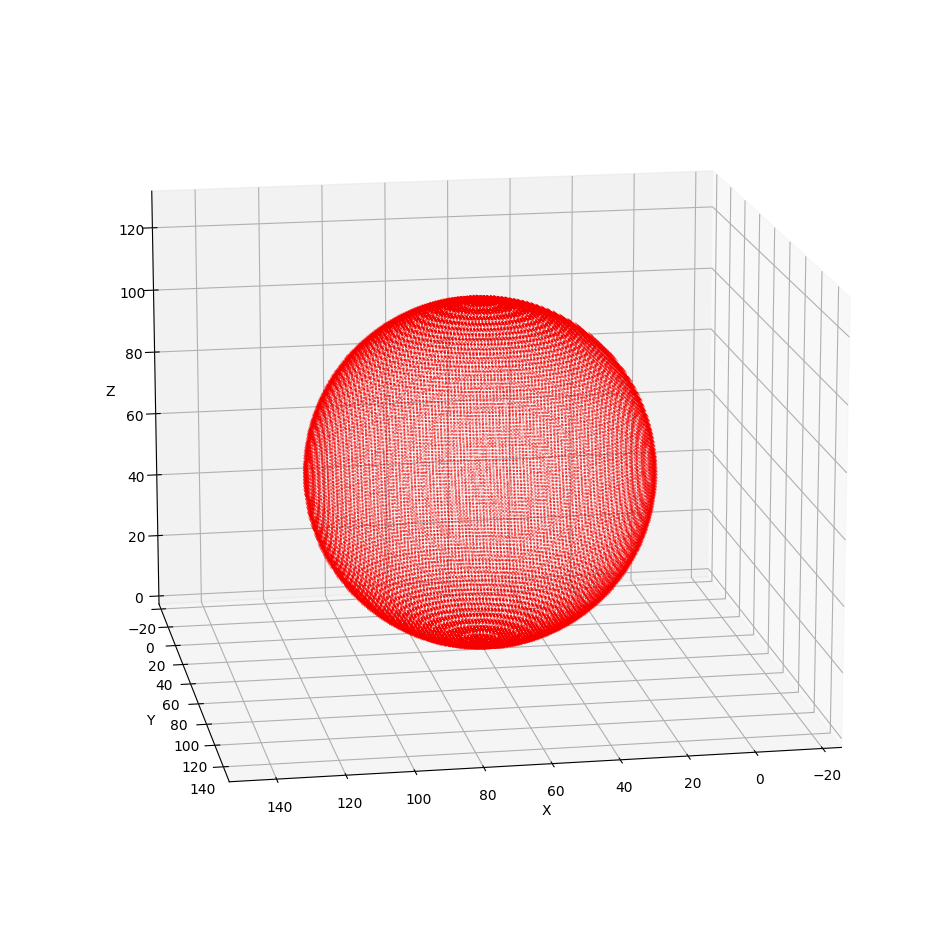

In [189]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



b = np.loadtxt('C:/Users/kanta/desktop/choten/sphere128.txt', delimiter=',')
b = np.delete(b, 0, axis=1)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(X1, Y1, Z1, s = 0.05, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

In [191]:
#128の座標に色情報が入った配列

whole = np.zeros((128,128,128,3))
whole = whole.astype(np.int32)
dot = virtex.shape[0]
virtex = virtex.astype(np.int32)

for i in range(dot):
    x = virtex[i,0]
    y = virtex[i,1]
    z = virtex[i,2]
    whole[x,y,z] = [100,200,255]  #BGR

"""
#for i in range(dot):
for i in range(128):
    for j in range(128):
        for k in range(128):
            if np.all(virtex[0] == whole[i,j,k]):
    print("GG")"""

'\n#for i in range(dot):\nfor i in range(128):\n    for j in range(128):\n        for k in range(128):\n            if np.all(virtex[0] == whole[i,j,k]):\n    print("GG")'

In [192]:
#i,j,kで指定して取り出して，DCTする

#スライスで取り出す
block = np.zeros((8,8,8,3))
block = whole[0:8,0:8,0:8,:]
whole_DCT = np.zeros((128,128,128,3))
print(block)

for i in range(16):
     for j in range(16):
          for k in range(16):
               block = whole[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:]
               #ここでDCTをする?
               whole_DCT[i*8:(i*8+8),j*8:(j*8+8),k*8:(k*8+8),:] = block
#print(block)

whole_DCT = whole_DCT.astype(np.int32)
print(whole_DCT[127,127,127])

"""
block = np.zeros((8,8,8))
for i in range(8):
    for j in range(8):
        for k in range(8):
            block[i,j,k] = whole
"""

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

'\nblock = np.zeros((8,8,8))\nfor i in range(8):\n    for j in range(8):\n        for k in range(8):\n            block[i,j,k] = whole\n'

[[ 12  57  56   0]
 [ 12  57  56   1]
 [ 12  57  56   2]
 ...
 [118  67  64   0]
 [118  67  64   1]
 [118  67  64   2]]
[[ 12  57  56]
 [ 12  57  57]
 [ 12  57  58]
 ...
 [118  67  62]
 [118  67  63]
 [118  67  64]]


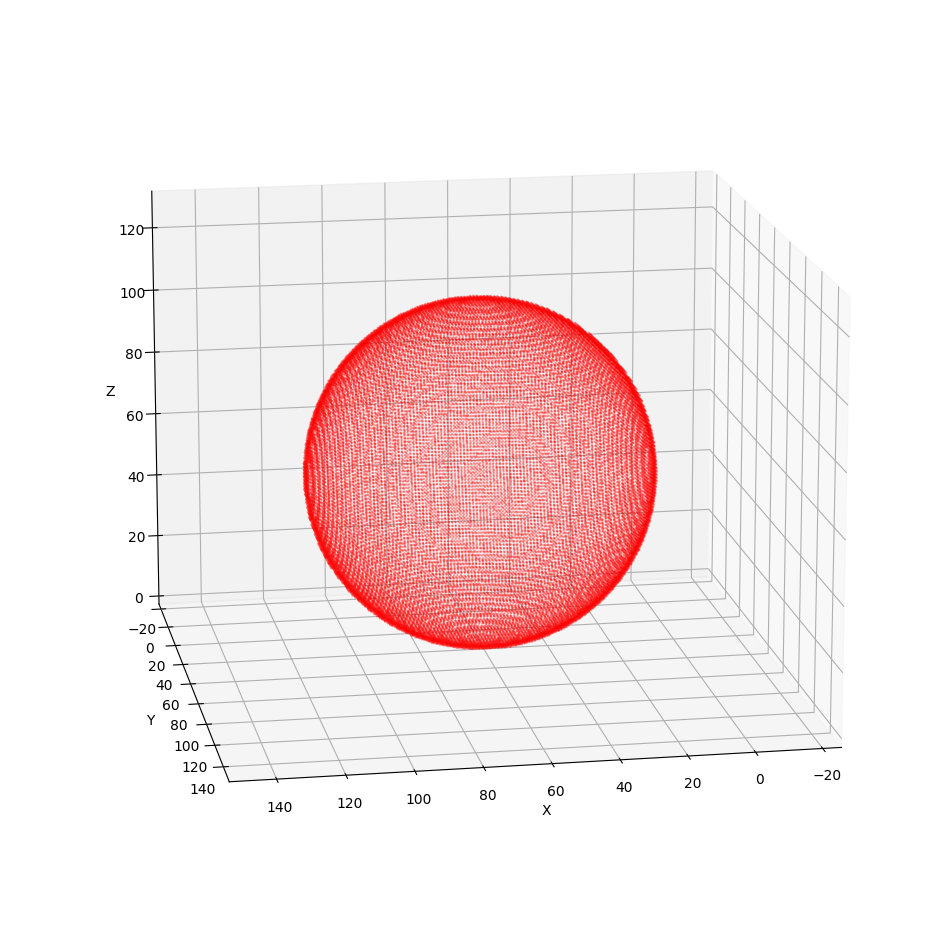

In [195]:
#128の座標に色情報が入った配列から表示できるようにする
#ここまで今日のノルマ

nonzero_coords = np.transpose(np.nonzero(whole_DCT))
print(nonzero_coords)
#GBRごとに分割
G = nonzero_coords[0::3]
B = nonzero_coords[1::3]
R  = nonzero_coords[2::3]

#色を削除して表示(R)
RR = np.delete(R, 3, axis=1)
print(RR)
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(RR[:,0], RR[:,1], RR[:,2], s = 0.5, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()

#色指定をうまくできれば，色ごとに分けなくても表示ができるようになる

In [181]:
#テスト用
mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18],[19,20,21]])

# 3n行目(nは0以上の整数)のみを取り出した新しい二次元行列を生成する
new_mat = mat[np.arange(2, mat.shape[0], 3)]

# 結果を表示
print(new_mat)

[[ 7  8  9]
 [16 17 18]]


In [103]:
#8に分割

#分割のテスト
test = np.arange(64)
test = test.reshape((4,4,4))
#print(test)

test2 = np.dsplit(test,2)
test3 = test2[0]
#print(test3)


#ほんちゃん
a = np.arange(128*128*128)
a = a.reshape((128,128,128))
z = np.vsplit(a,16)

y = np.arange(())
#yを定義
for i in range(16):
    y[i] = np.split(z[i],16)


"""
z0 = z[0]
y = np.hsplit(z0,16)
#print(y[0])
y0 = y[0]
x = np.dsplit(y0,16)
print(x[0])
"""

ValueError: array split does not result in an equal division